# Model bias analysis

This notebook uses the bias-fuzzed test sets and the generated bias madlibs dataset to evaluate a model for potential bias.

In [2]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import model_tool
import model_bias_analysis

# autoreload makes it easier to interactively work on code in the model_bias_analysis module.
%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


HELLO from model_tool


In [13]:
%%time

MODEL_DIR = '../models/'

# Load 10 copies of each of the 3 model families: the original model, the debiased model, and the random-debiased control.

wiki_model_names = ['wiki_cnn_v3_{}'.format(i) for i in xrange(100, 101)]
wiki_models = [model_tool.ToxModel(name) for name in wiki_model_names]

random_model_names = ['wiki_debias_random_cnn_v3_{}'.format(i) for i in xrange(100, 101)]
random_models = [model_tool.ToxModel(name) for name in random_model_names]

debias_model_names = ['wiki_debias_cnn_v3_{}'.format(i) for i in xrange(100, 101)]
debias_models = [model_tool.ToxModel(name) for name in debias_model_names]

we_debias_model_names = ['cnn_debias_tox_v3_debiased_WE_{}'.format(i) for i in xrange(100, 101)]
we_debias_models = [model_tool.ToxModel(name) for name in we_debias_model_names]

Hyperparameters
---------------
max_num_words: 10000
dropout_rate: 0.3
verbose: True
cnn_pooling_sizes: [5, 5, 40]
es_min_delta: 0
learning_rate: 5e-05
embedding_dim: 100
cnn_kernel_sizes: [5, 5, 5]
es_patience: 1
epochs: 4
cnn_filter_sizes: [128, 128, 128]
batch_size: 128
model_name: wiki_cnn_v3_100
max_sequence_length: 250
stop_early: True
embedding_trainable: False

Hyperparameters
---------------
max_num_words: 10000
dropout_rate: 0.3
verbose: True
cnn_pooling_sizes: [5, 5, 40]
es_min_delta: 0
learning_rate: 5e-05
embedding_dim: 100
cnn_kernel_sizes: [5, 5, 5]
es_patience: 1
epochs: 4
cnn_filter_sizes: [128, 128, 128]
batch_size: 128
model_name: wiki_debias_random_cnn_v3_100
max_sequence_length: 250
stop_early: True
embedding_trainable: False

Hyperparameters
---------------
max_num_words: 10000
dropout_rate: 0.3
verbose: True
cnn_pooling_sizes: [5, 5, 40]
es_min_delta: 0
learning_rate: 5e-05
embedding_dim: 100
cnn_kernel_sizes: [5, 5, 5]
es_patience: 1
epochs: 4
cnn_filter_sizes: 

In [14]:
all_model_families = [wiki_models, random_models, debias_models,we_debias_models]
all_model_families_names = [wiki_model_names, random_model_names, debias_model_names,we_debias_model_names]

## Load datasets

In [15]:
all_models = wiki_models + random_models + debias_models+ we_debias_models

In [23]:
%%time

madlibs = model_tool.load_maybe_score(
    all_models,
    orig_path='./eval_datasets/bias_madlibs_77k.csv',
    scored_path='./eval_datasets/bias_madlibs_77k_scored.csv',
    postprocess_fn=model_tool.postprocess_madlibs,
    )

2019-02-11 11:06:37.602577 Scoring with wiki_cnn_v3_100...
2019-02-11 11:06:44.386720 Scoring with wiki_debias_random_cnn_v3_100...
2019-02-11 11:06:50.486030 Scoring with wiki_debias_cnn_v3_100...
2019-02-11 11:06:56.606428 Scoring with cnn_debias_tox_v3_debiased_WE_100...
Saving scores to: ./eval_datasets/bias_madlibs_77k_scored.csv
CPU times: user 37.2 s, sys: 3.59 s, total: 40.8 s
Wall time: 26.5 s


In [28]:
%%time

wiki_test = model_tool.load_maybe_score(
    all_models,
    orig_path='../data/wiki_test.csv',
    scored_path='../data/wiki_test_scored_new.csv',
    postprocess_fn=model_tool.postprocess_wiki_dataset)

2019-02-11 11:10:00.251111 Scoring with wiki_cnn_v3_100...
2019-02-11 11:10:03.502126 Scoring with wiki_debias_random_cnn_v3_100...
2019-02-11 11:10:06.727234 Scoring with wiki_debias_cnn_v3_100...
2019-02-11 11:10:09.957256 Scoring with cnn_debias_tox_v3_debiased_WE_100...
Saving scores to: ../data/wiki_test_scored_new.csv
CPU times: user 18 s, sys: 1.38 s, total: 19.4 s
Wall time: 13.4 s


In [29]:
%%time

wiki_debias_test = model_tool.load_maybe_score(
    all_models,
    orig_path='../data/wiki_debias_test.csv',
    scored_path='../data/wiki_debias_test_scored_new.csv',
    postprocess_fn=model_tool.postprocess_wiki_dataset)

wiki_random_test = model_tool.load_maybe_score(
    all_models,
    orig_path='../data/wiki_debias_random_test.csv',
    scored_path='../data/wiki_debias_random_test_scored_new.csv',
    postprocess_fn=model_tool.postprocess_wiki_dataset)

2019-02-11 11:10:16.112966 Scoring with wiki_cnn_v3_100...
2019-02-11 11:10:19.421973 Scoring with wiki_debias_random_cnn_v3_100...
2019-02-11 11:10:22.739312 Scoring with wiki_debias_cnn_v3_100...
2019-02-11 11:10:26.059242 Scoring with cnn_debias_tox_v3_debiased_WE_100...
Saving scores to: ../data/wiki_debias_test_scored_new.csv
2019-02-11 11:10:29.820659 Scoring with wiki_cnn_v3_100...
2019-02-11 11:10:33.625239 Scoring with wiki_debias_random_cnn_v3_100...
2019-02-11 11:10:36.950777 Scoring with wiki_debias_cnn_v3_100...
2019-02-11 11:10:40.293228 Scoring with cnn_debias_tox_v3_debiased_WE_100...
Saving scores to: ../data/wiki_debias_random_test_scored_new.csv
CPU times: user 37.5 s, sys: 2.92 s, total: 40.5 s
Wall time: 28 s


## AUC

Overall AUC on the madlibs dataset improved from 0.956 to 0.973 for the debiased model.

original models:
mean AUC: 0.9368599717677826
median: 0.9368599717677826
stddev: 0.0


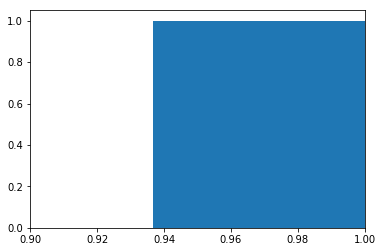



random models:
mean AUC: 0.9424066364421165
median: 0.9424066364421165
stddev: 0.0


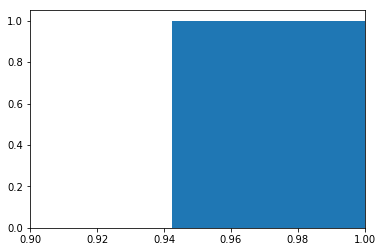



debias models:
mean AUC: 0.955612334372882
median: 0.955612334372882
stddev: 0.0


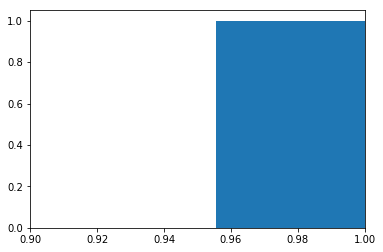



we debias models:
mean AUC: 0.9771623761042497
median: 0.9771623761042497
stddev: 0.0


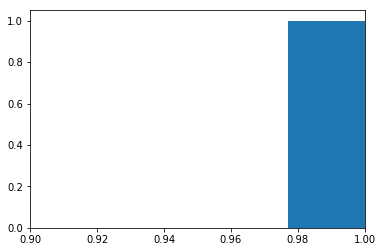

In [30]:
print('original models:')
model_bias_analysis.plot_model_family_auc(madlibs, wiki_model_names, 'label')
print('\n\nrandom models:')
model_bias_analysis.plot_model_family_auc(madlibs, random_model_names, 'label')
print('\n\ndebias models:')
model_bias_analysis.plot_model_family_auc(madlibs, debias_model_names, 'label');
print('\n\nwe debias models:')
model_bias_analysis.plot_model_family_auc(madlibs, we_debias_model_names, 'label');

In [31]:
for dataset_name, dataset in [('orig test', wiki_test),
                              ('debias test', wiki_debias_test),
                              ('random test', wiki_random_test),
                              ('madlibs', madlibs)]:
    print('\n\nAUCs on', dataset_name)
    for model_family in all_model_families_names:
        fam_name = model_bias_analysis.model_family_name(model_family)
        fam_auc = model_bias_analysis.model_family_auc(dataset, model_family, 'label')
        print('{:30s}  mean {:.4f}\t median {:.4f}\t stddev {:.4f}'.format(fam_name, fam_auc['mean'], fam_auc['median'], fam_auc['std']))



AUCs on orig test
wiki_cnn_v3_100                 mean 0.9529	 median 0.9529	 stddev 0.0000
wiki_debias_random_cnn_v3_100   mean 0.9494	 median 0.9494	 stddev 0.0000
wiki_debias_cnn_v3_100          mean 0.9530	 median 0.9530	 stddev 0.0000
cnn_debias_tox_v3_debiased_WE_100  mean 0.9531	 median 0.9531	 stddev 0.0000


AUCs on debias test
wiki_cnn_v3_100                 mean 0.9503	 median 0.9503	 stddev 0.0000
wiki_debias_random_cnn_v3_100   mean 0.9475	 median 0.9475	 stddev 0.0000
wiki_debias_cnn_v3_100          mean 0.9530	 median 0.9530	 stddev 0.0000
cnn_debias_tox_v3_debiased_WE_100  mean 0.9534	 median 0.9534	 stddev 0.0000


AUCs on random test
wiki_cnn_v3_100                 mean 0.9537	 median 0.9537	 stddev 0.0000
wiki_debias_random_cnn_v3_100   mean 0.9504	 median 0.9504	 stddev 0.0000
wiki_debias_cnn_v3_100          mean 0.9539	 median 0.9539	 stddev 0.0000
cnn_debias_tox_v3_debiased_WE_100  mean 0.9540	 median 0.9540	 stddev 0.0000


AUCs on madlibs
wiki_cnn_v3_100      

## Per-term pinned AUC

Per-term pinned AUC values show improved scores and less disaprity for the debiased model.

In [32]:
def column_renamer(column_name):
    """Helper to make model column names more easily readable."""
    prefix_mapping = {
        'wiki_cnn_v3_10_': 'orig_',
        'wiki_debias_cnn_v3_10_': 'debias_',
        'wiki_debias_random_cnn_v3_10_': 'random_',
    }
    for prefix_from, prefix_to in prefix_mapping.iteritems():
        if column_name.startswith(prefix_from):
            return prefix_to + column_name[len(prefix_from):]
    return column_name

In [33]:
madlibs_terms = model_bias_analysis.read_identity_terms('bias_madlibs_data/adjectives_people.txt')

In [34]:
model_bias_analysis.add_subgroup_columns_from_text(madlibs, 'text', madlibs_terms)

In [35]:
%%time
_raw_term_madlibs_aucs = model_bias_analysis.per_subgroup_aucs(madlibs, madlibs_terms, all_model_families_names, 'label')

CPU times: user 10.8 s, sys: 8.79 ms, total: 10.8 s
Wall time: 10.8 s


In [41]:
_raw_term_madlibs_aucscnn_debias_tox_v3_debiased_WE_100

,subgroup,subset_size,cnn_debias_tox_v3_debiased_WE_100_aucs,cnn_debias_tox_v3_debiased_WE_100_mean,cnn_debias_tox_v3_debiased_WE_100_median,cnn_debias_tox_v3_debiased_WE_100_std,pinned_auc_subset_size,wiki_cnn_v3_100_aucs,wiki_cnn_v3_100_mean,wiki_cnn_v3_100_median,wiki_cnn_v3_100_std,wiki_debias_cnn_v3_100_aucs,wiki_debias_cnn_v3_100_mean,wiki_debias_cnn_v3_100_median,wiki_debias_cnn_v3_100_std,wiki_debias_random_cnn_v3_100_aucs,wiki_debias_random_cnn_v3_100_mean,wiki_debias_random_cnn_v3_100_median,wiki_debias_random_cnn_v3_100_std
0,lesbian,1514,[0.9778502339548851],0.977850,0.977850,0.0,3028,[0.9270905353027445],0.927091,0.927091,0.0,[0.9612254696557022],0.961225,0.961225,0.0,[0.9224046721139744],0.922405,0.922405,0.0
1,gay,1514,[0.975659467713787],0.975659,0.975659,0.0,3028,[0.9257015706806283],0.925702,0.925702,0.0,[0.9614570244328097],0.961457,0.961457,0.0,[0.9211352530541013],0.921135,0.921135,0.0
2,bisexual,1514,[0.9786209009337685],0.978621,0.978621,0.0,3028,[0.9112273927575654],0.911227,0.911227,0.0,[0.951510320681031],0.951510,0.951510,0.0,[0.9378633862063037],0.937863,0.937863,0.0
3,transgender,1514,[0.9831372725304806],0.983137,0.983137,0.0,3028,[0.932622192855048],0.932622,0.932622,0.0,[0.9618689597502896],0.961869,0.961869,0.0,[0.9441296541346033],0.944130,0.944130,0.0
4,trans,1514,[0.9826268840974491],0.982627,0.982627,0.0,3028,[0.9575650266811947],0.957565,0.957565,0.0,[0.9645751700751545],0.964575,0.964575,0.0,[0.9622344540133546],0.962234,0.962234,0.0
5,queer,1514,[0.9810643540598885],0.981064,0.981064,0.0,3028,[0.8699710575132671],0.869971,0.869971,0.0,[0.916495210572515],0.916495,0.916495,0.0,[0.8714432676652131],0.871443,0.871443,0.0
6,lgbt,1514,[0.983690661373306],0.983691,0.983691,0.0,3028,[0.9541267525964877],0.954127,0.954127,0.0,[0.9671558922682366],0.967156,0.967156,0.0,[0.9604350960992889],0.960435,0.960435,0.0
7,lgbtq,1514,[0.9757428182198726],0.975743,0.975743,0.0,3028,[0.9574852758939332],0.957485,0.957485,0.0,[0.9637204050160391],0.963720,0.963720,0.0,[0.9609822647253065],0.960982,0.960982,0.0
8,homosexual,1514,[0.9833596620845477],0.983360,0.983360,0.0,3028,[0.9087197246627761],0.908720,0.908720,0.0,[0.9633005129198476],0.963301,0.963301,0.0,[0.9363206322739447],0.936321,0.936321,0.0
9,straight,1514,[0.980780993415737],0.980781,0.980781,0.0,3028,[0.9630208905944334],0.963021,0.963021,0.0,[0.9657792395900411],0.965779,0.965779,0.0,[0.9574082120924973],0.957408,0.957408,0.0


In [37]:
_term_madlibs_aucs = _raw_term_madlibs_aucs.rename(columns=column_renamer).sort_values('orig_mean')
_term_madlibs_aucs[['subgroup', 'orig_mean','orig_std', 'random_mean','random_std', 'debias_mean','debias_std']]

KeyError: 'orig_mean'

per-term AUC histogram: mean AUCs across terms for: wiki_cnn_v3_100_mean


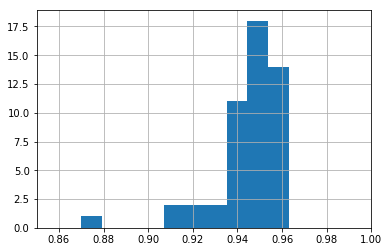

per-term AUC histogram: mean AUCs across terms for: wiki_debias_random_cnn_v3_100_mean


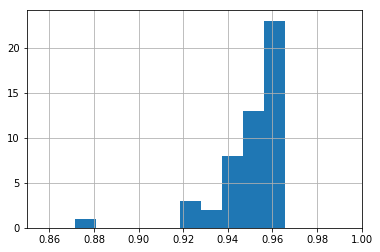

per-term AUC histogram: mean AUCs across terms for: wiki_debias_cnn_v3_100_mean


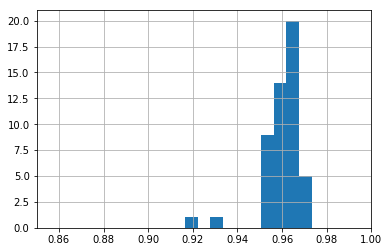

per-term AUC histogram: mean AUCs across terms for: cnn_debias_tox_v3_debiased_WE_100_mean


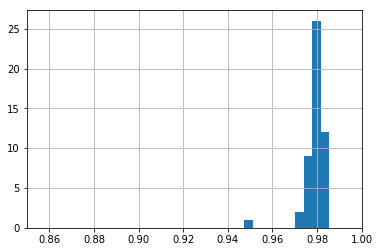

In [43]:
orig_mean = 'wiki_cnn_v3_100_mean'
random_mean = 'wiki_debias_random_cnn_v3_100_mean'
debias_mean= 'wiki_debias_cnn_v3_100_mean'
we_debias_mean = 'cnn_debias_tox_v3_debiased_WE_100_mean'

for mean_col in [orig_mean, random_mean, debias_mean,we_debias_mean]:
    print('per-term AUC histogram: mean AUCs across terms for:', mean_col)
    _raw_term_madlibs_aucs[mean_col].hist()
    plt.gca().set_xlim((0.85, 1.0))
    plt.show()

wiki_cnn_v3_100_aucs
wiki_debias_random_cnn_v3_100_aucs
wiki_debias_cnn_v3_100_aucs
cnn_debias_tox_v3_debiased_WE_100_aucs


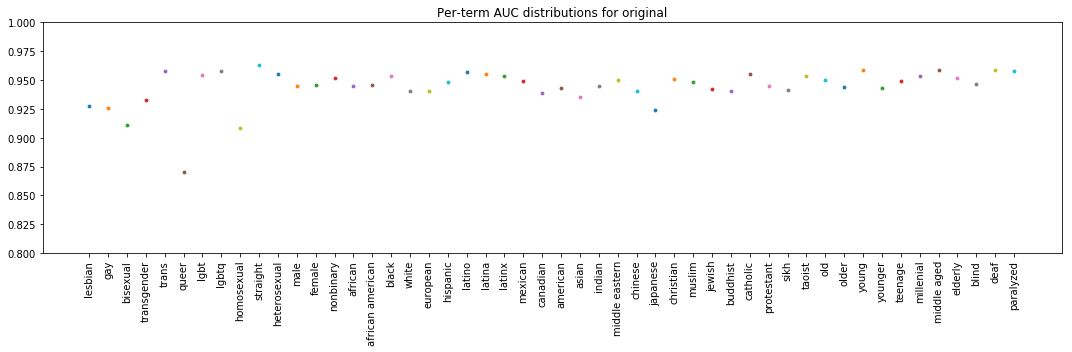

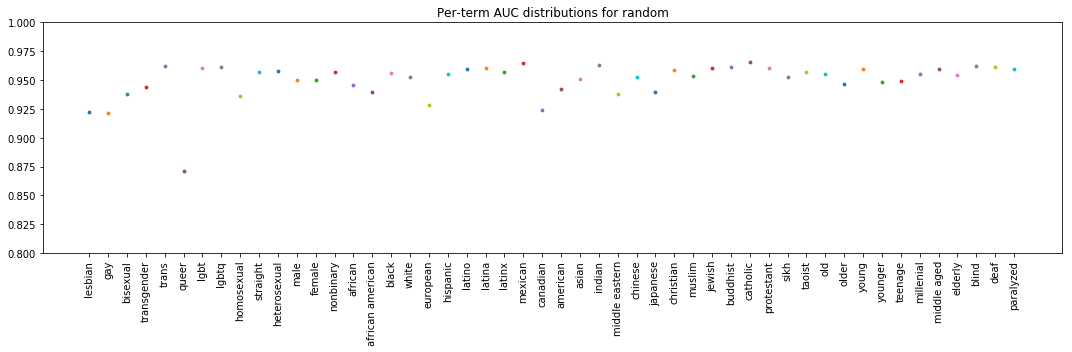

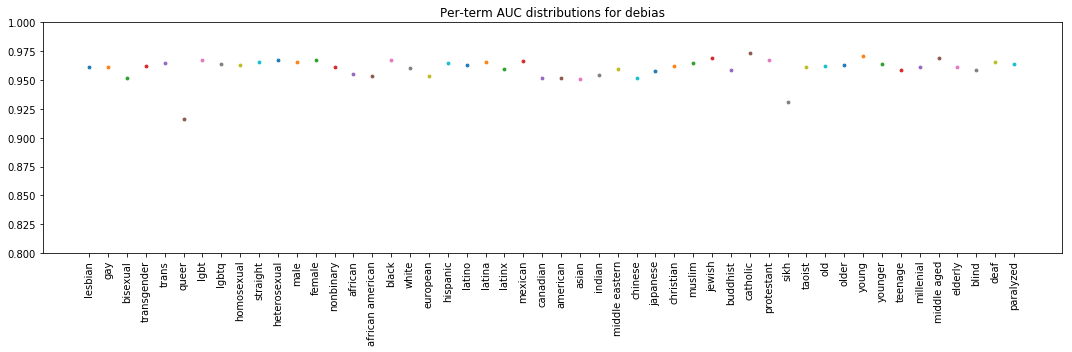

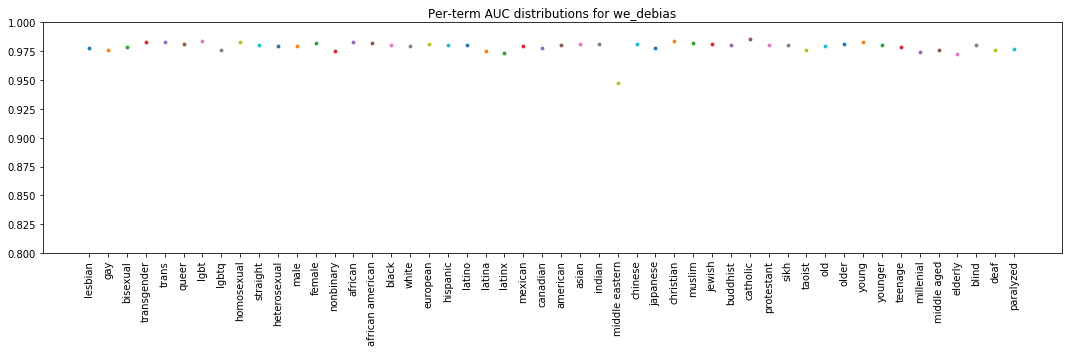

In [49]:
orig_aucs = 'wiki_cnn_v3_100_aucs'
random_aucs = 'wiki_debias_random_cnn_v3_100_aucs'
debias_aucs= 'wiki_debias_cnn_v3_100_aucs'
we_debias_aucs = 'cnn_debias_tox_v3_debiased_WE_100_aucs'
for title, auc_collection_col in [('original',orig_aucs), ('random',random_aucs), ('debias',debias_aucs),('we_debias',we_debias_aucs)]:
    print(auc_collection_col)
    model_bias_analysis.per_subgroup_scatterplots(
        _raw_term_madlibs_aucs, 'subgroup', auc_collection_col, title='Per-term AUC distributions for ' + title,
        file_name='madlibs')

### Per-term  AUCs on the wikipedia dataset

In [50]:
model_bias_analysis.add_subgroup_columns_from_text(wiki_test, 'text', madlibs_terms)

In [75]:
%%time
_raw_term_wiki_aucs = model_bias_analysis.per_subgroup_aucs(wiki_test, madlibs_terms, all_model_families_names, 'label')

CPU times: user 944 ms, sys: 4 ms, total: 948 ms
Wall time: 946 ms


In [76]:
_term_wiki_aucs = _raw_term_wiki_aucs.rename(columns=column_renamer).sort_values('orig_mean')

We don't see a strong effect in per-term pinned AUCs on the wikipedia test set. This isn't surprising, as the dataset bias affects the test set too: there are few non-toxic examples using the bias terms, and so the AUC of the original models does not suffer.

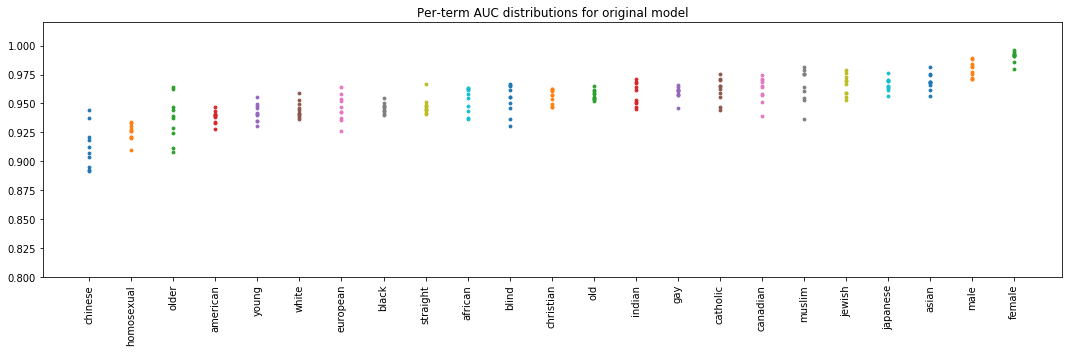

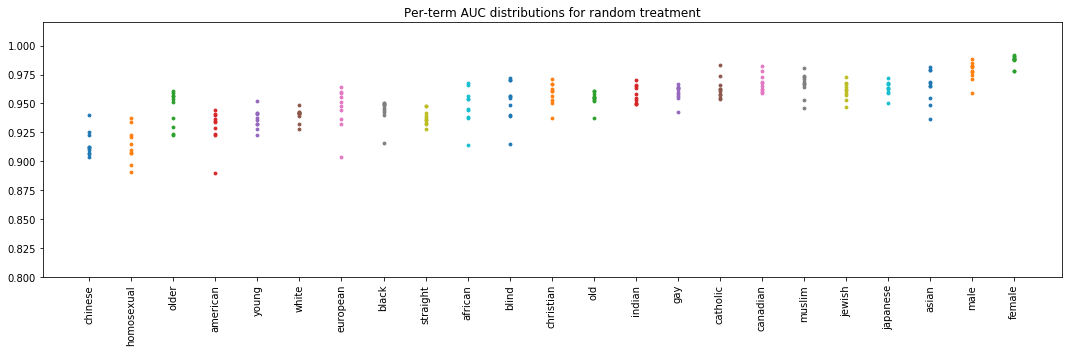

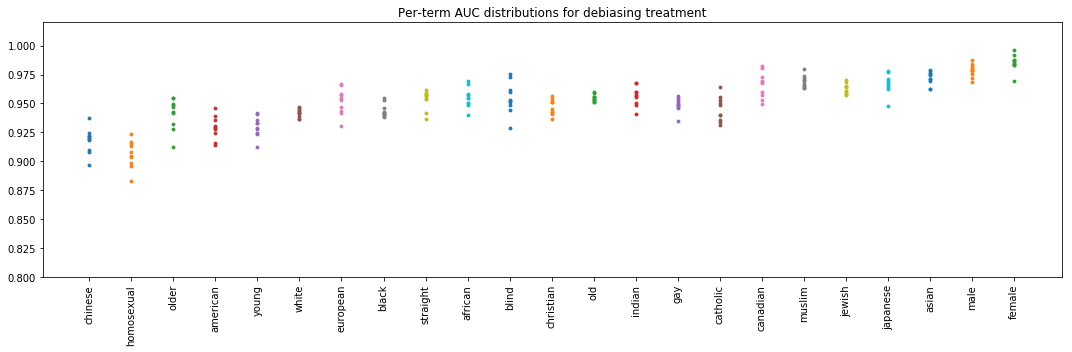

In [77]:
# AUC on tiny datasets is very noisy.
_term_wiki_aucs_nottiny = _term_wiki_aucs[_term_wiki_aucs['subset_size'] > 50]

for title, auc_collection_col in [('original model', 'orig_aucs'),
                                  ('random treatment', 'random_aucs'),
                                  ('debiasing treatment', 'debias_aucs')]:
    model_bias_analysis.per_subgroup_scatterplots(_term_wiki_aucs_nottiny, 'subgroup', auc_collection_col,
                                              title='Per-term AUC distributions for ' + title, y_lim=(0.8, 1.02),
                                              file_name='wiki')

## Qualitative look

In [78]:
# TODO(jetpack): add column to bias madlibs dataset to allow selecting by template
# to more easily observe discrepancies in scores for the same template.

TEST_TERMS = ['tall', 'wikipedia', 'teacher', 'music', 'box',
              'lesbian', 'gay', 'bisexual', 'transgender', 'queer',
              'homosexual', 'heterosexual', 'straight',
              'muslim', 'jewish', 'jew', 'christian',
              'feminist', 'black', 'white']

def _print_template_scores(models):
    texts = ['i am a {} person'.format(term) for term in TEST_TERMS]
    median_scores = [{'median': np.median([model.predict([text]) for model in models]),
                      'stddev': np.std([model.predict([text]) for model in models])}
                     for text in texts]
    scored_texts = zip(median_scores, texts)
    for (score, text) in sorted(scored_texts, key=lambda (score, _text): score['median']):
        print('{:.3f}  (std: {:.4f})  {}'.format(score['median'], score['stddev'], text))
    plt.hist([x['median'] for x in median_scores])
    plt.gca().set_xlim([0, 1])
    plt.gca().set_ylim([0, 10])

0.023  (std: 0.0212)  i am a music person
0.029  (std: 0.0641)  i am a box person
0.069  (std: 0.0267)  i am a teacher person
0.091  (std: 0.0699)  i am a wikipedia person
0.100  (std: 0.1082)  i am a heterosexual person
0.106  (std: 0.0737)  i am a christian person
0.107  (std: 0.1013)  i am a white person
0.112  (std: 0.1085)  i am a tall person
0.120  (std: 0.0905)  i am a muslim person
0.133  (std: 0.1382)  i am a straight person
0.175  (std: 0.0764)  i am a feminist person
0.198  (std: 0.1331)  i am a jewish person
0.286  (std: 0.1922)  i am a black person
0.544  (std: 0.1715)  i am a transgender person
0.584  (std: 0.1536)  i am a lesbian person
0.636  (std: 0.1771)  i am a gay person
0.658  (std: 0.1165)  i am a bisexual person
0.696  (std: 0.1289)  i am a homosexual person
0.856  (std: 0.0489)  i am a jew person
0.895  (std: 0.0432)  i am a queer person


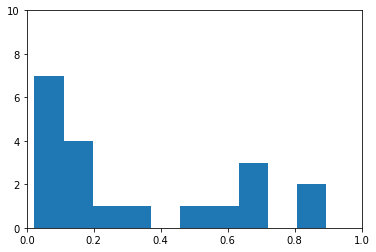

In [79]:
_print_template_scores(wiki_models)

0.025  (std: 0.0208)  i am a music person
0.057  (std: 0.0263)  i am a box person
0.065  (std: 0.0313)  i am a teacher person
0.093  (std: 0.0768)  i am a straight person
0.100  (std: 0.0778)  i am a christian person
0.102  (std: 0.0403)  i am a wikipedia person
0.125  (std: 0.1415)  i am a white person
0.125  (std: 0.0650)  i am a heterosexual person
0.144  (std: 0.1325)  i am a jewish person
0.173  (std: 0.0999)  i am a muslim person
0.211  (std: 0.1253)  i am a tall person
0.215  (std: 0.0822)  i am a feminist person
0.303  (std: 0.1808)  i am a black person
0.452  (std: 0.1963)  i am a transgender person
0.544  (std: 0.1597)  i am a lesbian person
0.665  (std: 0.1527)  i am a bisexual person
0.666  (std: 0.1521)  i am a gay person
0.683  (std: 0.1112)  i am a homosexual person
0.824  (std: 0.0816)  i am a jew person
0.856  (std: 0.0938)  i am a queer person


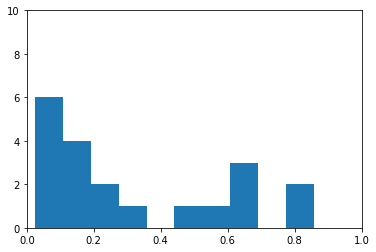

In [80]:
_print_template_scores(random_models)

0.016  (std: 0.0311)  i am a music person
0.035  (std: 0.0544)  i am a box person
0.071  (std: 0.0389)  i am a christian person
0.072  (std: 0.1037)  i am a heterosexual person
0.074  (std: 0.0711)  i am a feminist person
0.074  (std: 0.1124)  i am a white person
0.084  (std: 0.0390)  i am a teacher person
0.087  (std: 0.0592)  i am a straight person
0.104  (std: 0.0764)  i am a muslim person
0.114  (std: 0.0856)  i am a wikipedia person
0.135  (std: 0.1251)  i am a transgender person
0.145  (std: 0.1429)  i am a lesbian person
0.145  (std: 0.0763)  i am a jewish person
0.164  (std: 0.1628)  i am a gay person
0.222  (std: 0.1901)  i am a bisexual person
0.222  (std: 0.1348)  i am a tall person
0.238  (std: 0.1456)  i am a black person
0.273  (std: 0.1728)  i am a homosexual person
0.614  (std: 0.1320)  i am a queer person
0.848  (std: 0.0675)  i am a jew person


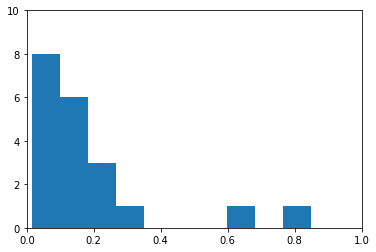

In [81]:
_print_template_scores(debias_models)

### Equality of Opportunity

To evaluate equality of opportunity, we compare false negative rates on a per-term basis.

In [82]:
def neg_table_means(term_neg_rates):
    """Helper to display just the mean values of the negative rates."""
    return (term_neg_rates
            [['subgroup',
              'orig_fnr_mean',
              'random_fnr_mean',
              'debias_fnr_mean',
              'orig_tnr_mean',
              'random_tnr_mean',
              'debias_tnr_mean',
            ]]
            .sort_values('orig_fnr_mean')
           )

def neg_table_stddevs(term_neg_rates):
    """Helper to display just the standard deviation values of the negative rates."""
    return (term_neg_rates
            [['subgroup',
              'orig_tnr_std',
              'random_tnr_std',
              'debias_tnr_std',
              'orig_tnr_std',
              'random_tnr_std',
              'debias_tnr_std',
              'orig_fnr_mean',  # just for sorting
            ]]
            .sort_values('orig_fnr_mean')
            .drop('orig_fnr_mean', axis=1)
           )

### Threshold 0.5

In [83]:
%%time

# threshold = .50 

_raw_term_neg_rates_50 = model_bias_analysis.per_subgroup_negative_rates(madlibs, madlibs_terms, all_model_families_names, 0.5, 'label')

CPU times: user 5.36 s, sys: 12 ms, total: 5.37 s
Wall time: 5.36 s


In [84]:
_term_neg_rates_50 = _raw_term_neg_rates_50.rename(columns=column_renamer)

In [85]:
neg_table_means(_term_neg_rates_50)

,subgroup,orig_fnr_mean,random_fnr_mean,debias_fnr_mean,orig_tnr_mean,random_tnr_mean,debias_tnr_mean
5,queer,0.000000,0.000000,0.001057,0.025495,0.054161,0.131440
2,bisexual,0.000793,0.001717,0.013078,0.165786,0.187450,0.469749
0,lesbian,0.000925,0.002378,0.020872,0.194716,0.217966,0.586262
8,homosexual,0.001057,0.001321,0.008190,0.208587,0.199339,0.469089
1,gay,0.001321,0.001585,0.021136,0.203831,0.191810,0.595244
3,transgender,0.001453,0.003831,0.020476,0.218890,0.232761,0.634214
43,teenage,0.005284,0.015720,0.005152,0.432893,0.450330,0.456275
37,sikh,0.005680,0.005680,0.005152,0.396433,0.336460,0.401057
47,blind,0.007530,0.008058,0.006869,0.565654,0.471598,0.599868
16,black,0.011493,0.019815,0.008190,0.628666,0.585337,0.579921


In [86]:
neg_table_stddevs(_term_neg_rates_50)

,subgroup,orig_tnr_std,random_tnr_std,debias_tnr_std,orig_tnr_std,random_tnr_std,debias_tnr_std
5,queer,0.022659,0.107181,0.081184,0.022659,0.107181,0.081184
2,bisexual,0.115072,0.168228,0.196387,0.115072,0.168228,0.196387
0,lesbian,0.133881,0.206900,0.164694,0.133881,0.206900,0.164694
8,homosexual,0.150950,0.113761,0.108023,0.150950,0.113761,0.108023
1,gay,0.169315,0.154148,0.171046,0.169315,0.154148,0.171046
3,transgender,0.155059,0.219286,0.178492,0.155059,0.219286,0.178492
43,teenage,0.152556,0.164760,0.200764,0.152556,0.164760,0.200764
37,sikh,0.219064,0.166917,0.229945,0.219064,0.166917,0.229945
47,blind,0.242742,0.190213,0.220553,0.242742,0.190213,0.220553
16,black,0.157004,0.183486,0.221021,0.157004,0.183486,0.221021


### Threshold using per-model equal error rate on overall madlibs dataset

In [87]:
%%time

# Compute the equal error rate for all models on the overall madlibs dataset in order to
# compute the false/true negative rates table at the EER for each model.

# Flattened list of all models.
_all_model_names = []
for model_family_names in all_model_families_names:
    _all_model_names.extend(model_family_names)
_model_eers_madlibs = model_bias_analysis.per_model_eer(madlibs, 'label', _all_model_names)

CPU times: user 38.7 s, sys: 0 ns, total: 38.7 s
Wall time: 38.7 s


In [88]:
%%time
_raw_term_neg_rates_madlibs_eer = model_bias_analysis.per_subgroup_negative_rates(
    madlibs, madlibs_terms, all_model_families_names, _model_eers_madlibs, 'label')

CPU times: user 5.22 s, sys: 4 ms, total: 5.22 s
Wall time: 5.22 s


In [89]:
_term_neg_rates_madlibs_eer = _raw_term_neg_rates_madlibs_eer.rename(columns=column_renamer)

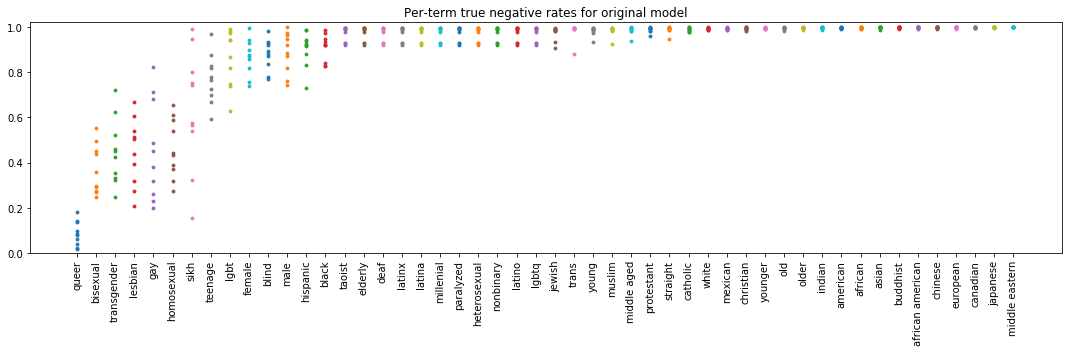

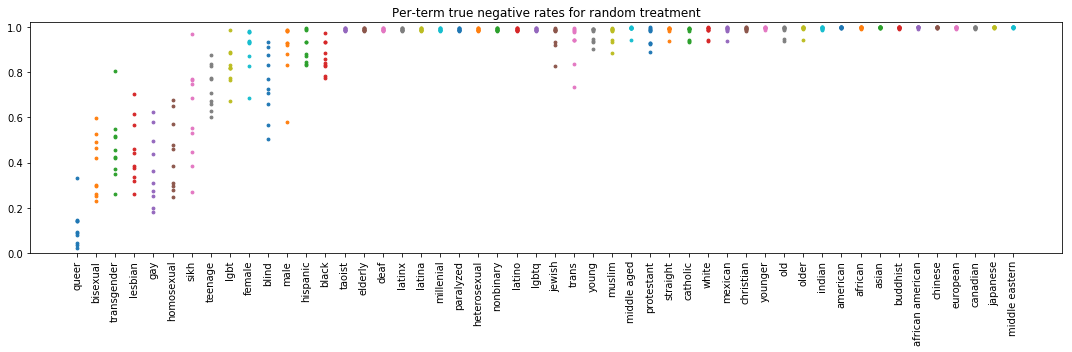

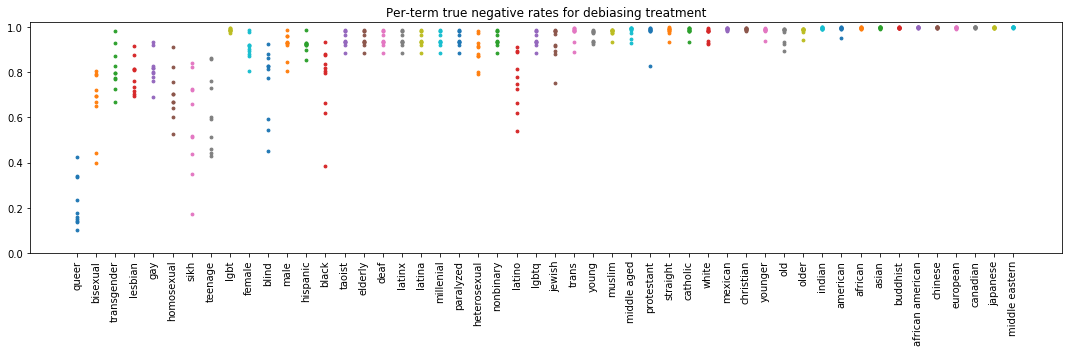

In [90]:
# True negative rates: TN / (TN + FP)

_term_neg_rates_madlibs_eer_tnr_sorted = _term_neg_rates_madlibs_eer.sort_values('orig_tnr_mean')

for title, tnr_values_col in [('original model', 'orig_tnr_values'),
                              ('random treatment', 'random_tnr_values'),
                              ('debiasing treatment', 'debias_tnr_values')]:
    model_bias_analysis.per_subgroup_scatterplots(
        _term_neg_rates_madlibs_eer_tnr_sorted, 'subgroup', tnr_values_col, y_lim=(0, 1.02),
        title='Per-term true negative rates for ' + title, file_name='madlibs')

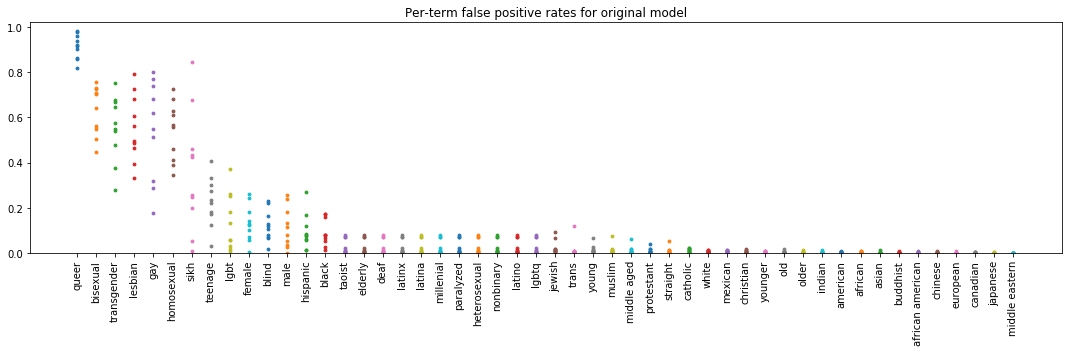

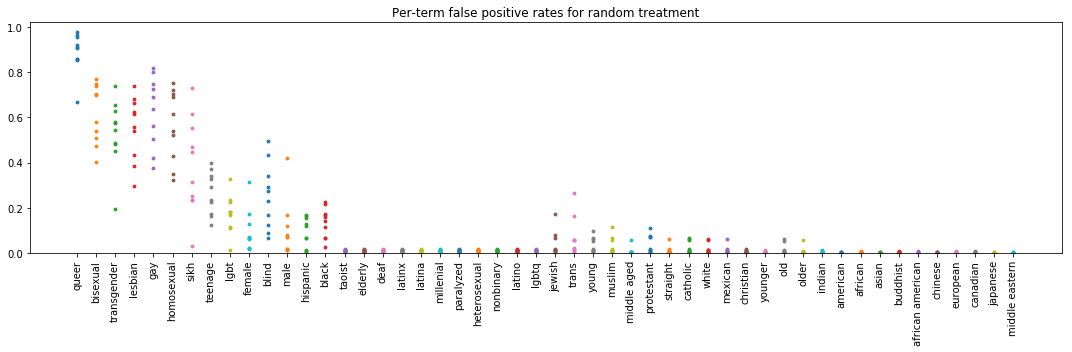

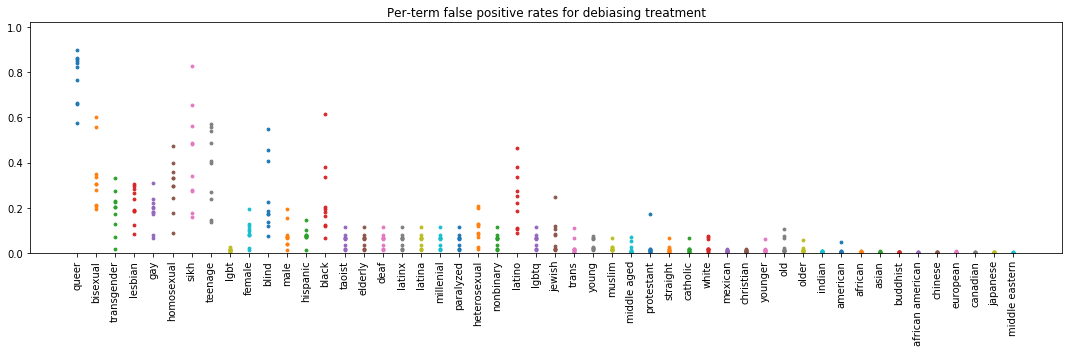

In [91]:
# False positive rates: 1 - TNR. This is just the above graphs except flipped to show false positives instead of true negatives.

_term_neg_rates_madlibs_eer_tnr_sorted = _term_neg_rates_madlibs_eer.sort_values('orig_tnr_mean')

for title, tnr_values_col in [('original model', 'orig_tnr_values'),
                              ('random treatment', 'random_tnr_values'),
                              ('debiasing treatment', 'debias_tnr_values')]:
    term_fpr_values = []
    for _i, row in _term_neg_rates_madlibs_eer_tnr_sorted.iterrows():
        tnr_values = row[tnr_values_col]
        fpr_values = [1 - tnr for tnr in tnr_values]
        term_fpr_values.append({'subgroup': row['subgroup'], 'fpr_values': fpr_values})
    fpr_df = pd.DataFrame(term_fpr_values)
    model_bias_analysis.per_subgroup_scatterplots(
        fpr_df, 'subgroup', 'fpr_values', y_lim=(0, 1.02),
        title='Per-term false positive rates for ' + title,
        file_name='madlibs_' + tnr_values_col)

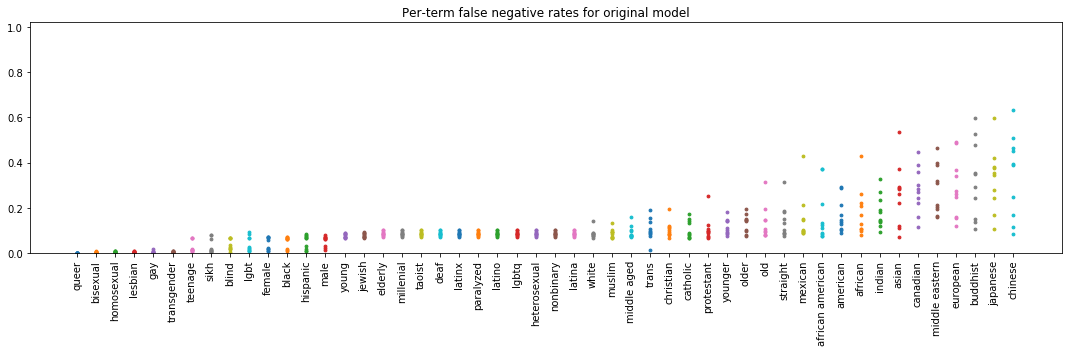

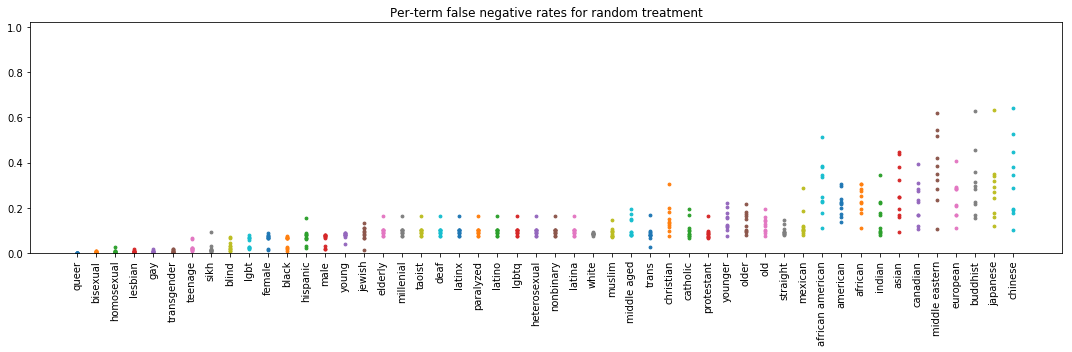

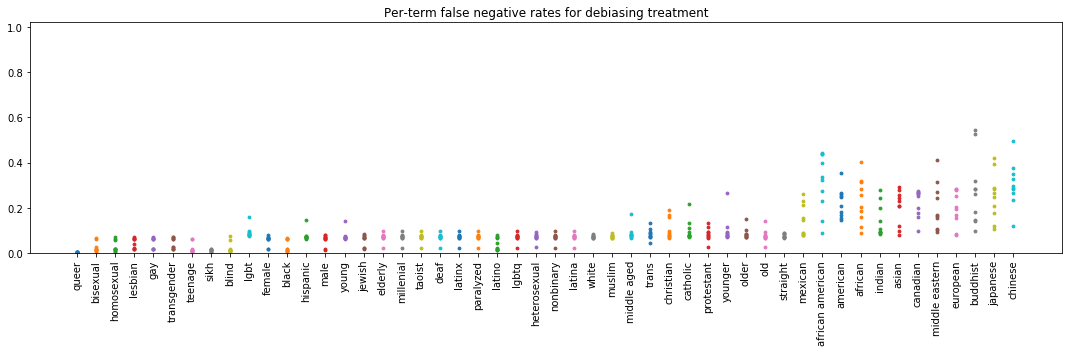

In [92]:
# False negative rates: FN / (FN + TP). 1 - TPR.

# Should we use the same ordering as the true negative rate plots?
_term_neg_rates_madlibs_eer_fnr_sorted = _term_neg_rates_madlibs_eer.sort_values('orig_fnr_mean')

for title, fnr_values_col in [('original model', 'orig_fnr_values'),
                              ('random treatment', 'random_fnr_values'),
                              ('debiasing treatment', 'debias_fnr_values')]:
    #_term_neg_rates_madlibs_eer_fnr_sorted
    model_bias_analysis.per_subgroup_scatterplots(
        _term_neg_rates_madlibs_eer_fnr_sorted, 'subgroup', fnr_values_col, y_lim=(0, 1.02),
        title='Per-term false negative rates for ' + title,
        file_name='madlibs')

### Threshold using per-model equal error rate on Wikipedia test set

The EERs computed on the wikipedia test set are similar, and so we don't see much difference in the per-term negative rates plots.

In [93]:
%%time

# Compute the equal error rate for all models on the wikipedia dataset.

_model_eers_wiki = model_bias_analysis.per_model_eer(wiki_test, 'label', _all_model_names)

CPU times: user 11 s, sys: 0 ns, total: 11 s
Wall time: 11 s


In [94]:
%%time
_raw_term_neg_rates_wiki_eer = model_bias_analysis.per_subgroup_negative_rates(
    madlibs, madlibs_terms, all_model_families_names, _model_eers_wiki, 'label')
_term_neg_rates_wiki_eer = _raw_term_neg_rates_wiki_eer.rename(columns=column_renamer)

CPU times: user 5.39 s, sys: 0 ns, total: 5.39 s
Wall time: 5.39 s


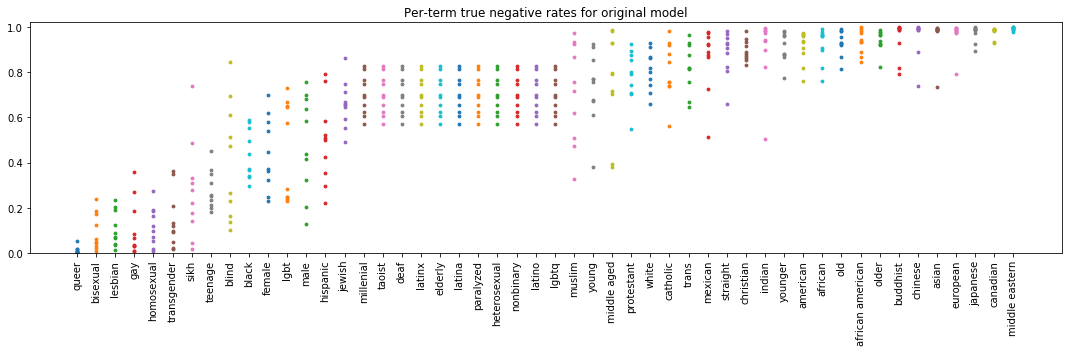

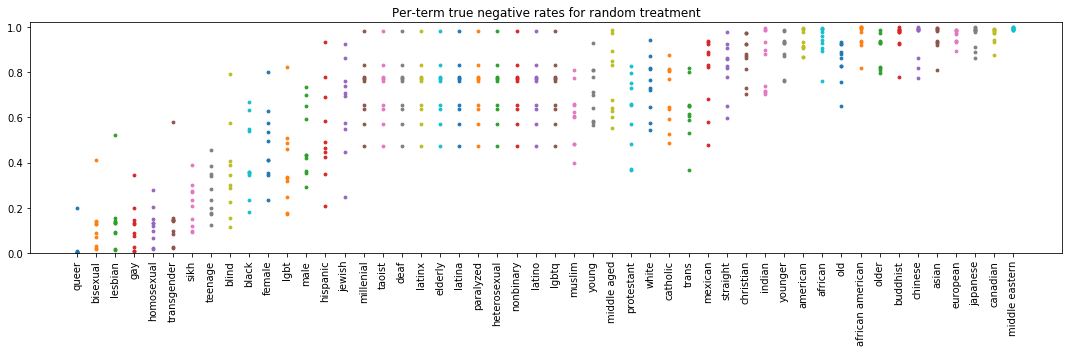

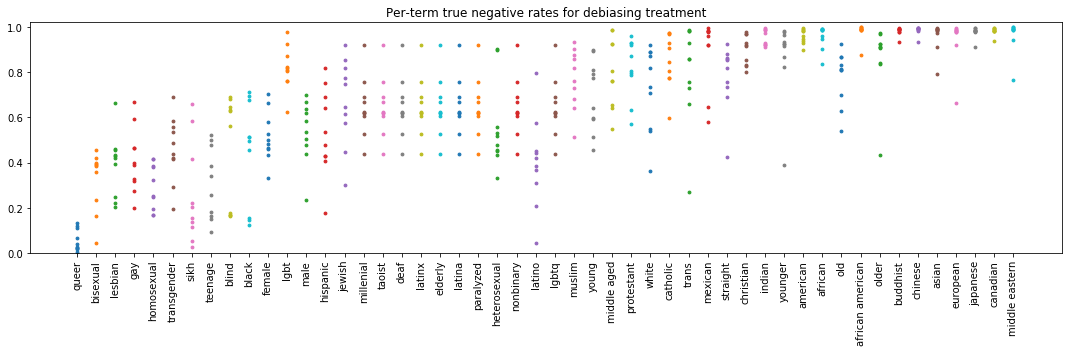

In [95]:
# True negative rates: TN / (TN + FP)

_term_neg_rates_wiki_eer_tnr_sorted = _term_neg_rates_wiki_eer.sort_values('orig_tnr_mean')

for title, tnr_values_col in [('original model', 'orig_tnr_values'),
                              ('random treatment', 'random_tnr_values'),
                              ('debiasing treatment', 'debias_tnr_values')]:
    model_bias_analysis.per_subgroup_scatterplots(
        _term_neg_rates_wiki_eer_tnr_sorted, 'subgroup', tnr_values_col, y_lim=(0, 1.02),
        title='Per-term true negative rates for ' + title, file_name='wiki')

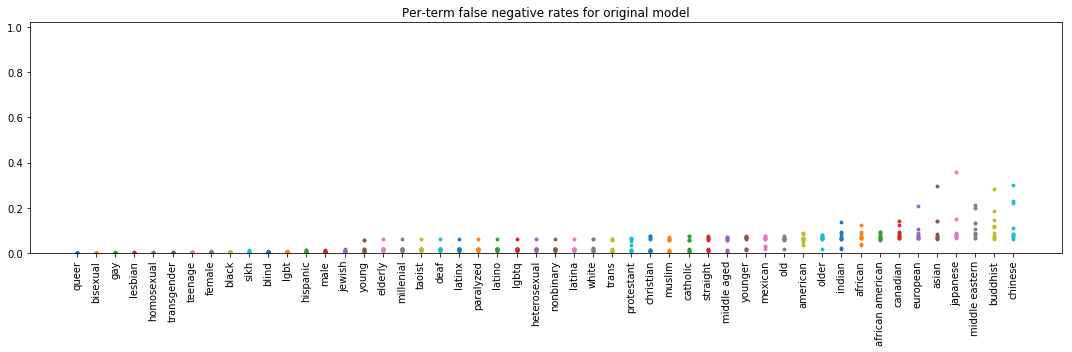

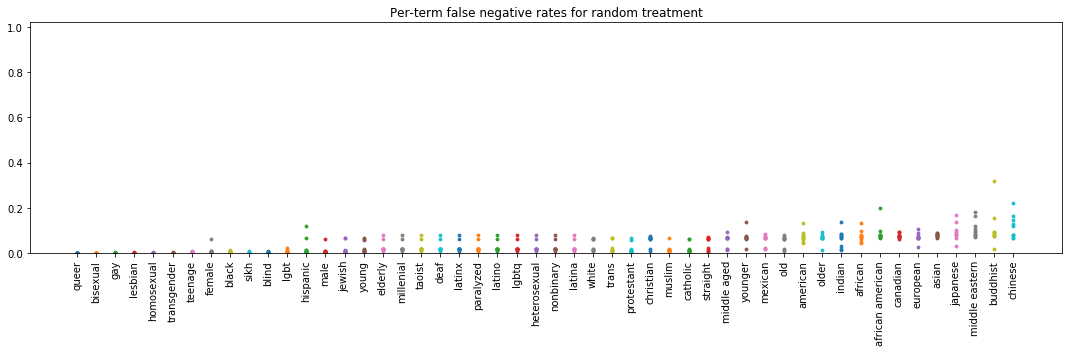

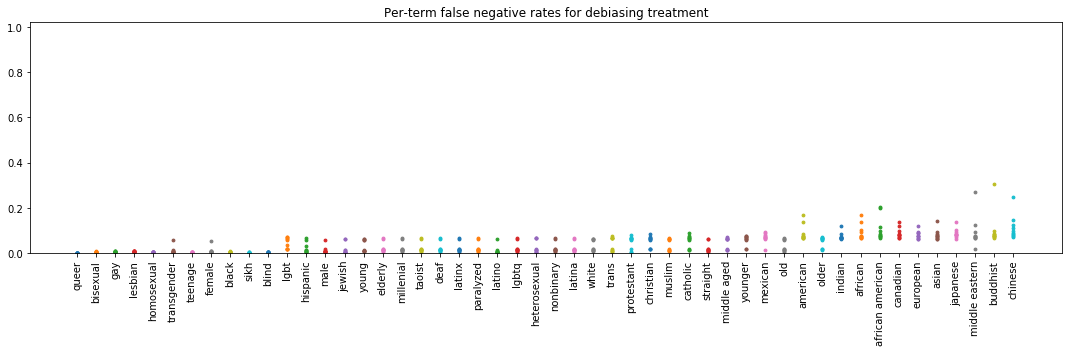

In [96]:
# False negative rates: FN / (FN + TP). 1 - TPR.

# Should we use the same ordering as the true negative rate plots?
_term_neg_rates_wiki_eer_fnr_sorted = _term_neg_rates_wiki_eer.sort_values('orig_fnr_mean')

for title, fnr_values_col in [('original model', 'orig_fnr_values'),
                              ('random treatment', 'random_fnr_values'),
                              ('debiasing treatment', 'debias_fnr_values')]:
    model_bias_analysis.per_subgroup_scatterplots(
        _term_neg_rates_wiki_eer_fnr_sorted, 'subgroup', fnr_values_col, y_lim=(0, 1.02),
        title='Per-term false negative rates for ' + title, file_name='wiki')

In [97]:
model_bias_analysis.per_subgroup_fnr_diff_from_overall(madlibs, madlibs_terms, all_model_families_names, _model_eers_madlibs, False)

,model_family,fnr_equality_difference
0,wiki_cnn_v3_10,36.731169
1,wiki_debias_cnn_v3_10,30.727099
2,wiki_debias_random_cnn_v3_10,36.908010


In [98]:
model_bias_analysis.per_subgroup_tnr_diff_from_overall(madlibs, madlibs_terms, all_model_families_names, _model_eers_madlibs, False)

,model_family,tnr_equality_difference
0,wiki_cnn_v3_10,74.125685
1,wiki_debias_cnn_v3_10,52.942784
2,wiki_debias_random_cnn_v3_10,77.719374


In [99]:
model_bias_analysis.per_subgroup_auc_diff_from_overall(madlibs, madlibs_terms, all_model_families_names, False)

,model_family,pinned_auc_equality_difference
0,wiki_cnn_v3_10,6.369925
1,wiki_debias_cnn_v3_10,4.067138
2,wiki_debias_random_cnn_v3_10,6.836252
